In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
from sklearn.metrics import classification_report 
from sklearn.metrics import roc_curve, plot_roc_curve, roc_auc_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing training set
train_df = pd.read_csv('datasets/train.csv')
train_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
train_df.drop(["Unnamed: 0","id"] , axis=1, inplace=True)

# Importing function
%run ./auxiliar_functions/varNorm.ipynb

train_df = varNorm(train_df)

In [4]:
train_df.columns

Index(['gender', 'customer_type', 'age', 'type_of_travel', 'class',
       'flight_distance', 'inflight_wifi_service',
       'departure/arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'on_board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'satisfaction'],
      dtype='object')

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   gender                             103904 non-null  object 
 1   customer_type                      103904 non-null  object 
 2   age                                103904 non-null  int64  
 3   type_of_travel                     103904 non-null  object 
 4   class                              103904 non-null  object 
 5   flight_distance                    103904 non-null  int64  
 6   inflight_wifi_service              103904 non-null  int64  
 7   departure/arrival_time_convenient  103904 non-null  int64  
 8   ease_of_online_booking             103904 non-null  int64  
 9   gate_location                      103904 non-null  int64  
 10  food_and_drink                     103904 non-null  int64  
 11  online_boarding                    1039

In [6]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,103904.0,39.379706,15.114964,7.0,27.0,40.0,51.0,85.0
flight_distance,103904.0,1189.448375,997.147281,31.0,414.0,843.0,1743.0,4983.0
inflight_wifi_service,103904.0,2.729683,1.327829,0.0,2.0,3.0,4.0,5.0
departure/arrival_time_convenient,103904.0,3.060296,1.525075,0.0,2.0,3.0,4.0,5.0
ease_of_online_booking,103904.0,2.756901,1.398929,0.0,2.0,3.0,4.0,5.0
gate_location,103904.0,2.976883,1.277621,0.0,2.0,3.0,4.0,5.0
food_and_drink,103904.0,3.202129,1.329533,0.0,2.0,3.0,4.0,5.0
online_boarding,103904.0,3.250375,1.349509,0.0,2.0,3.0,4.0,5.0
seat_comfort,103904.0,3.439396,1.319088,0.0,2.0,4.0,5.0,5.0
inflight_entertainment,103904.0,3.358158,1.332991,0.0,2.0,4.0,4.0,5.0


In [7]:
for col in train_df.columns:
    if train_df[col].nunique() <= 10:
        print("{}:".format(col))
        print(train_df[col].unique())
        print("="*48)

gender:
['male' 'female']
customer_type:
['loyal_customer' 'disloyal_customer']
type_of_travel:
['personal_travel' 'business_travel']
class:
['eco_plus' 'business' 'eco']
inflight_wifi_service:
[3 2 4 1 5 0]
departure/arrival_time_convenient:
[4 2 5 3 1 0]
ease_of_online_booking:
[3 2 5 4 1 0]
gate_location:
[1 3 2 5 4 0]
food_and_drink:
[5 1 2 4 3 0]
online_boarding:
[3 5 2 1 4 0]
seat_comfort:
[5 1 2 3 4 0]
inflight_entertainment:
[5 1 2 3 4 0]
on_board_service:
[4 1 2 3 5 0]
leg_room_service:
[3 5 4 2 1 0]
baggage_handling:
[4 3 5 1 2]
checkin_service:
[4 1 3 5 2 0]
inflight_service:
[5 4 3 1 2 0]
cleanliness:
[5 1 2 3 4 0]
satisfaction:
['neutral_or_dissatisfied' 'satisfied']


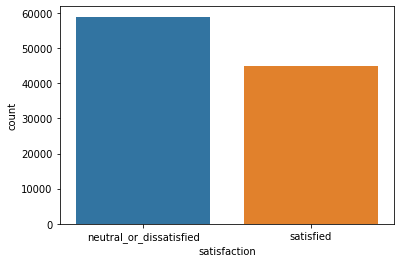

In [8]:
# Target variable
sns.countplot(x=train_df.satisfaction)
plt.show()

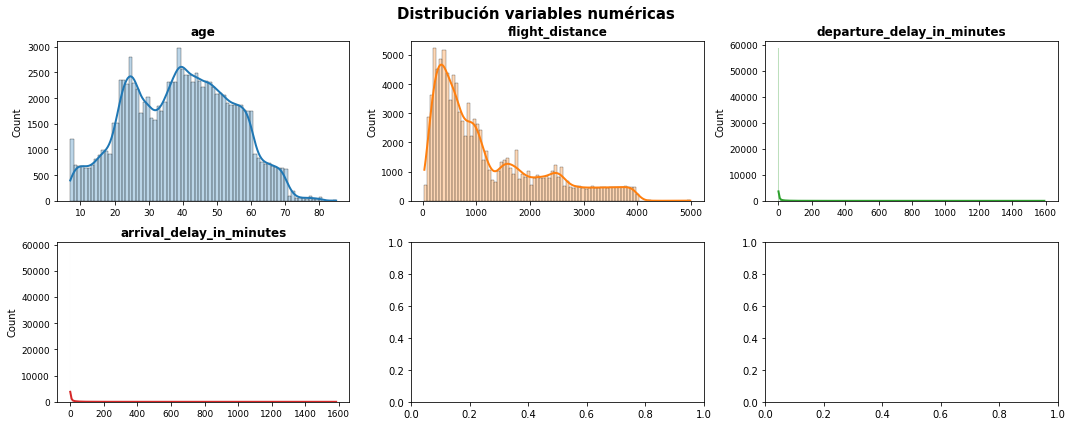

In [9]:
# Importing function
%run ./auxiliar_functions/distribution_plot.ipynb

distribution_plot(train_df)

## Modeling

In [10]:
cat_vars = ['gender','customer_type','type_of_travel','class'] # Categorical features
float_vars = ['age','flight_distance','departure_delay_in_minutes','arrival_delay_in_minutes'] # Floating features
int_vars = list(train_df.select_dtypes(exclude="object").columns)
int_vars = [var for var in int_vars if var not in float_vars] # Integer Features

le = LabelEncoder() # Target labeler
y_train = le.fit_transform(train_df.satisfaction)

# Categorical transformer
cat_transformer = Pipeline([
    ("cat_transformer", OneHotEncoder())])

# Numerical transformer
num_transformer = Pipeline([
    ("int_transformer", OrdinalEncoder())])

# Full pipeline transformer
full_pipeline = ColumnTransformer(transformers=[
    ('cat_trans', cat_transformer, cat_vars),
    ('num_trans', num_transformer, int_vars)
],remainder='drop')

# Transforming training set
X_train_prepared = full_pipeline.fit_transform(train_df)

In [11]:
# Searching for the best model
# ===================================================================================

models = {'SVC': SVC(), 
          'Logistic': LogisticRegression(),
          'Random Forest': RandomForestClassifier()
         }

n_models = len(models)
scores=[]

for name, model in models.items():
    y_train_pred = cross_val_predict(model, X_train_prepared, y_train, cv=3, n_jobs=-1)
    # Metrics score
    accuracy = np.mean(accuracy_score(y_train, y_train_pred)).round(2)
    precision = np.mean(precision_score(y_train, y_train_pred)).round(2)
    recall = np.mean(recall_score(y_train, y_train_pred)).round(2)
    f1 = np.mean(f1_score(y_train, y_train_pred)).round(2)

    model_scores = np.array([name, accuracy, precision, recall, f1])
    scores.append(np.array(model_scores))
          
scores_df = pd.DataFrame(scores, columns=['Model','Accuracy','Precision','Recall','F1'])
scores_df.set_index('Model', inplace=True)
scores_df.sort_values(by='F1', ascending=False)

,Accuracy,Precision,Recall,F1
Model,,,,
Random Forest,0.96,0.97,0.94,0.95
SVC,0.94,0.95,0.92,0.93
Logistic,0.87,0.87,0.84,0.85


In [12]:
# Creating training model
rforest_clf = RandomForestClassifier(random_state=42)

# 
y_pred = cross_val_predict(rforest_clf, X_train_prepared, y_train)

# Classification Report & Confusion Matrix
# ==============================================================================
print("Classification Report")
print("="*64)
print(confusion_matrix(y_train, y_pred))
print()
print("Classification Report")
print("="*64)
print(classification_report(y_train, y_pred))

Classification Report
[[57521  1358]
 [ 2829 42196]]

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     58879
           1       0.97      0.94      0.95     45025

    accuracy                           0.96    103904
   macro avg       0.96      0.96      0.96    103904
weighted avg       0.96      0.96      0.96    103904



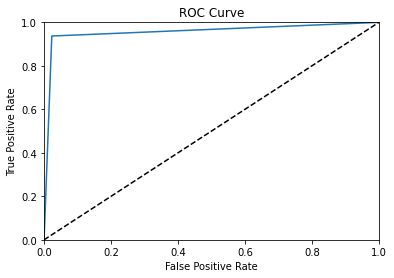

In [13]:
# Receiver Operating Characteristic Curve
# ================================================================================
y_probas = cross_val_predict(rforest_clf, X_train_prepared, y_train, 
                             cv=5, method='predict_proba', n_jobs=-1)

y_scores = y_probas[:,1]
threshold = 0.5
y_with_thres = (y_scores > threshold)

fpr, tpr, thresholds = roc_curve(y_train, y_with_thres)

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0,1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr, tpr)
plt.show()

In [14]:
# Area Under Curve Score
AUC = roc_auc_score(y_train, y_with_thres)
print("="*18)
print("AUC Score: {}".format(AUC.round(2)))
print("="*18)

AUC Score: 0.96


In [15]:
# Metrics performance score
trainPrecisionScore = precision_score(y_train, y_with_thres) # Precision Score
trainRecallScore= recall_score(y_train, y_with_thres) # Recall Score

print("Metrics Performance Scores:")
print("="*30)
print("Precision Score: {}".format(trainPrecisionScore.round(2)))
print("Recall Score: {}".format(trainRecallScore.round(2)))

Metrics Performance Scores:
Precision Score: 0.97
Recall Score: 0.94


In [16]:
# Creating final model
final_model = RandomForestClassifier(random_state=0)

# Training the final model
final_model.fit(X_train_prepared, y_train)

RandomForestClassifier(random_state=0)

In [17]:
# Importing test set
test_df = pd.read_csv('datasets/test.csv')
# Applying changes to variables and categorical values
test_df = varNorm(test_df)


X_test = test_df
y_test = test_df.pop('satisfaction')

# Applying transformations to test set
X_test_prepared = full_pipeline.transform(X_test)
y_test = le.transform(y_test)

# Final Predictions
predictions = final_model.predict(X_test_prepared)

In [18]:
print(classification_report(predictions, y_test))

# Metrics performance score
testPrecisionScore = precision_score(predictions, y_test) # Precision Score
testRecallScore= recall_score(predictions, y_test) # Recall Score

print("Metrics Performance Scores:")
print("="*42)
print("Precision Score: {}".format(testPrecisionScore.round(2)))
print("Recall Score: {}".format(testRecallScore.round(2)))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96     14876
           1       0.94      0.97      0.95     11100

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

Metrics Performance Scores:
Precision Score: 0.94
Recall Score: 0.97


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0d84b419-eb5c-4c7b-a299-559e37d00acb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>